# 🛠 03. Computer vision & convolutional neural networks in TensorFlow Exercises

1. Spend 20-minutes reading and interacting with the CNN explainer website.
2. What are the key terms? e.g. explain convolution in your own words, pooling in your own words
3. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.
4. What is the kernel size?
5. What is the stride?
6. How could you adjust each of these in TensorFlow code?
7. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
8. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import zipfile
import os
import matplotlib.image as mpimg

## Get the data

In [2]:
!wget https://raw.githubusercontent.com/krutika-shimpi/machine_learning_models/main/helper_function.py

--2024-03-29 04:58:17--  https://raw.githubusercontent.com/krutika-shimpi/machine_learning_models/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7764 (7.6K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.58K  --.-KB/s    in 0s      

2024-03-29 04:58:18 (79.7 MB/s) - ‘helper_function.py’ saved [7764/7764]



In [3]:
# Get the data
!wget https://github.com/krutika-shimpi/MyRepository/raw/main/Data.zip

--2024-03-29 04:58:19--  https://github.com/krutika-shimpi/MyRepository/raw/main/Data.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krutika-shimpi/MyRepository/main/Data.zip [following]
--2024-03-29 04:58:20--  https://raw.githubusercontent.com/krutika-shimpi/MyRepository/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1211976 (1.2M) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[===================>]   1.16M  --.-KB/s    in 0.02s   

2024-03-29 04:58:20 (64.9 MB/s) - ‘Data.zip’ saved [1211976/1211976]



In [4]:
!wget "http://download.tensorflow.org/example_images/flower_photos.tgz"

--2024-03-29 04:58:21--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.119.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  40.3MB/s    in 6.1s    

2024-03-29 04:58:27 (36.1 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [5]:
import tarfile

with tarfile.open('flower_photos.tgz', 'r:gz') as tar:
    tar.extractall()

In [6]:
# Lets walk through the data dir
data_dir = "Data"
for dirpath, dirname, filename in os.walk(data_dir):
  print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
data_dir = pathlib.Path(data_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

[]


## Visualize Visualize and visualize

In [8]:
# Plot some random images from the data
def plot_random_images(data_dir):
  """
  Returns a plot of randomly picked images from the data.
  """
  # Pick a path from paths and a random image
  paths = [dir for (dir,_,_) in os.walk(data_dir)]
  paths = paths[1:]

  plt.figure(figsize = (12, 6))
  for i in range(6):
    plt.subplot(2, 3, i + 1)
    random_path = np.random.choice(paths)
    random_image = np.random.choice(os.listdir(random_path), 1)

    # Read the image
    img = mpimg.imread(random_path + '/' + random_image[0].decode())
    # OR
    # os.path.join(random_path, random_image[0].decode())

    # Plot the image
    plt.imshow(img)
    plt.title(f"{random_path.split('/')[1]}")
    plt.xlabel(f"Image shape: {img.shape}")

  plt.tight_layout()
  plt.show()

  return img

ValueError: 'a' cannot be empty unless no samples are taken

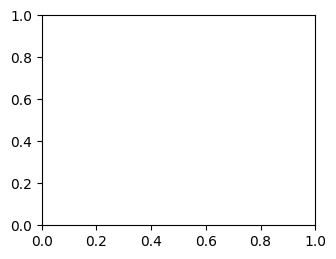

In [ ]:
# Plot random images
img = plot_random_images(data_dir = 'Data')

In [ ]:
img[0]

In [ ]:
# Get all pixel values to same levels
img/255.

## Lets create an end to end model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Preprocess the data (normalize/rescale the images bring all the pixel values between 0 and 1)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)

# Import data from directories and turn them into batches
data = datagen.flow_from_directory(directory = 'Data',
                                   target_size = (256, 256),
                                   batch_size = 32,
                                   class_mode = 'binary',
                                   seed = 42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.Sequential([

    layers.Input(shape = (256, 256, 3)),

    layers.Conv2D(filters = 10,
                  kernel_size = (3,3),
                  strides = 2,
                  activation = 'relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 10,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 10,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
model_1_history = model_1.fit(data,
                              epochs = 20)

In [ ]:
# check model plots
plt.plot(model_1_history.history['accuracy'], label = 'accuracy')
plt.plot(model_1_history.history['loss'], label = 'loss')
plt.legend()
plt.show()

In [ ]:
!wget -O image1.png https://raw.githubusercontent.com/krutika-shimpi/MyRepository/main/1.PNG
!wget -O image2.png https://raw.githubusercontent.com/krutika-shimpi/MyRepository/main/2.PNG

## Lets evaluate the model on the custom data


In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

## Lets walk through the directories

In [ ]:
# Let's display the number of images per directory in the dataset
for dirpath, dirname, filename in os.walk('flower_photos'):
  print(f'There are {len(dirname)} directories and {len(filename)} in {dirpath}')

There are 5 directories and 1 in flower_photos
There are 0 directories and 699 in flower_photos/sunflowers
There are 0 directories and 898 in flower_photos/dandelion
There are 0 directories and 641 in flower_photos/roses
There are 0 directories and 633 in flower_photos/daisy
There are 0 directories and 799 in flower_photos/tulips


In [ ]:
# Lets get the class names for each class
import pathlib
dir_name = 'flower_photos'
path_name = pathlib.Path(dir_name)
flower_classes = sorted([flower.name for flower in path_name.glob('*')])[1:]
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

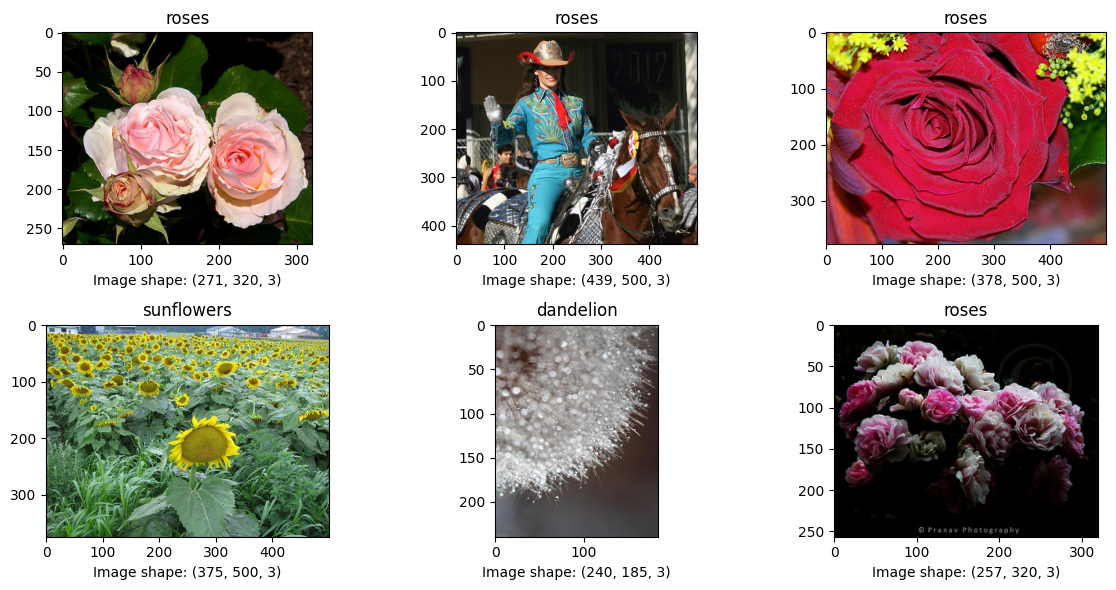

In [ ]:
# Plot random images and labels from the dataset
img = plot_random_images(data_dir = 'flower_photos')

## Let's get the data ready

In [ ]:
# Preprocess the images (bring all the images on to the scale of 0 to 1)
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)

# Fetch the data from the directories and turn them into batches
train_dataset = image_datagen.flow_from_directory(directory = 'flower_photos',
                                                  target_size = (224, 224),
                                                  classes = flower_classes,
                                                  class_mode = 'categorical',
                                                  batch_size = 32,
                                                  seed = 42)

Found 3670 images belonging to 5 classes.


In [ ]:
# Create a preprocessing function for rescaling the images
def rescale_images(images, labels):
    # Rescale the pixel values of images to the range [0, 1]
    images = images / 255.0
    return images, labels

# Fetch the data from the directories and turn them into batches
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = 'flower_photos',
                                                                 image_size = (224, 224),
                                                                 class_names = flower_classes,
                                                                 batch_size = 32,
                                                                 validation_split = 0.1,
                                                                 subset = 'training',
                                                                 seed = 42)

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory = 'flower_photos',
                                                               image_size = (224, 224),
                                                               class_names = flower_classes,
                                                               batch_size = 32,
                                                               validation_split = 0.1,
                                                               subset = 'validation',
                                                               seed = 42)
# Shuffle and prefetch the data
train_data = train_data.map(rescale_images).cache().shuffle(buffer_size = 1000).prefetch(tf.data.experimental.AUTOTUNE)
val_data = val_data.map(rescale_images).cache().prefetch(tf.data.experimental.AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Build the CNN model

### Setup callbacks

In [ ]:
from helper_function import plot_loss_curves, plot_random_images

In [ ]:
# Import the necessary library
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='loss',  # Monitor validation loss
                              factor=0.2,          # Factor by which the learning rate will be reduced
                              patience=2,          # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,         # Lower bound on the learning rate
                              verbose=1)           # Print a message when learning rate is reduced

# Define EarlStopping callback
early_stopping = EarlyStopping(monitor = 'loss',
                               patience = 2,
                               verbose = 1)

### Create a Data Augmentation layer


In [ ]:
# Lets add some augmentations to the data
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomZoom(0.6),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomContrast(0.7)
    ])

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the CNN model
model_2 = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(filters = 32,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.Conv2D(filters = 32,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 32,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.Conv2D(filters = 32,
                  kernel_size = (3,3),
                  strides = (2,2),
                  activation = 'relu'),
    layers.MaxPool2D(),



    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(len(flower_classes), activation = 'softmax')
])

# Compile the model
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
model_2_history = model_2.fit(train_dataset,
                              epochs = 100,
                              callbacks = [early_stopping, reduce_lr])

Epoch 1/100
115/115 [==============================] - 25s 167ms/step - loss: 1.4097 - accuracy: 0.3526 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 11s 95ms/step - loss: 1.2252 - accuracy: 0.4741 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 10s 89ms/step - loss: 1.1684 - accuracy: 0.5204 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 11s 94ms/step - loss: 1.1128 - accuracy: 0.5428 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 10s 85ms/step - loss: 1.0998 - accuracy: 0.5447 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 11s 92ms/step - loss: 1.0667 - accuracy: 0.5684 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 12s 106ms/step - loss: 1.0294 - accuracy: 0.5837 - lr: 0.0010
Epoch 8/100
115/115 [==============================] - 10s 90ms/step - loss: 1.0119 - accuracy: 0.6068 - lr: 0.0010
Epoch 9/100
115/115 [==============================] - 11s 93ms/step -

KeyboardInterrupt: 

In [ ]:
model_2.evaluate(val_data)

In [ ]:
plot_loss_curves(model_2_history, classification=True)

NameError: name 'model_2_history' is not defined

In [ ]:
!wget https://github.com/krutika-shimpi/Edureka_Internship_Assigments_solved/raw/main/7_Deep_Learning/Capture.PNG

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
img = load_and_prep_image('Capture.PNG')
pred_and_plot(model_2, 'Capture.PNG', class_names = flower_classes)

In [9]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-03-29 04:58:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  18.5MB/s    in 23s     

2024-03-29 04:59:20 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
# Import the dataset
import zipfile
zipref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zipref.extractall()
zipref.close()

In [11]:
# Lets walkthrough our data directory and check how many files are there
import os

data_dir = '10_food_classes_all_data'

for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f'There are {len(dirnames)} and {len(filenames)} images in the {dirpath}')

There are 2 and 0 images in the 10_food_classes_all_data
There are 10 and 0 images in the 10_food_classes_all_data/test
There are 0 and 250 images in the 10_food_classes_all_data/test/chicken_wings
There are 0 and 250 images in the 10_food_classes_all_data/test/grilled_salmon
There are 0 and 250 images in the 10_food_classes_all_data/test/ice_cream
There are 0 and 250 images in the 10_food_classes_all_data/test/steak
There are 0 and 250 images in the 10_food_classes_all_data/test/ramen
There are 0 and 250 images in the 10_food_classes_all_data/test/sushi
There are 0 and 250 images in the 10_food_classes_all_data/test/pizza
There are 0 and 250 images in the 10_food_classes_all_data/test/chicken_curry
There are 0 and 250 images in the 10_food_classes_all_data/test/hamburger
There are 0 and 250 images in the 10_food_classes_all_data/test/fried_rice
There are 10 and 0 images in the 10_food_classes_all_data/train
There are 0 and 750 images in the 10_food_classes_all_data/train/chicken_wings

In [12]:
def plot_random_images(data_dir):
  """
  Returns a plot of randomly picked images from the data.
  """
  # Pick a path from paths and a random image
  paths = [dir for (dir,_,_) in os.walk(data_dir)]
  paths = paths[1:]

  plt.figure(figsize = (12, 6))
  for i in range(6):
    plt.subplot(2, 3, i + 1)
    random_path = np.random.choice(paths)
    random_image = np.random.choice(os.listdir(random_path), 1)

    # Read the image
    img = mpimg.imread(random_path + '/' + random_image[0].decode())
    # OR
    # os.path.join(random_path, random_image[0].decode())

    # Plot the image
    plt.imshow(img)
    plt.title(f"{random_path.split('/')[-1]}")
    plt.xlabel(f"Image shape: {img.shape}")

  plt.tight_layout()
  plt.show()

  return img

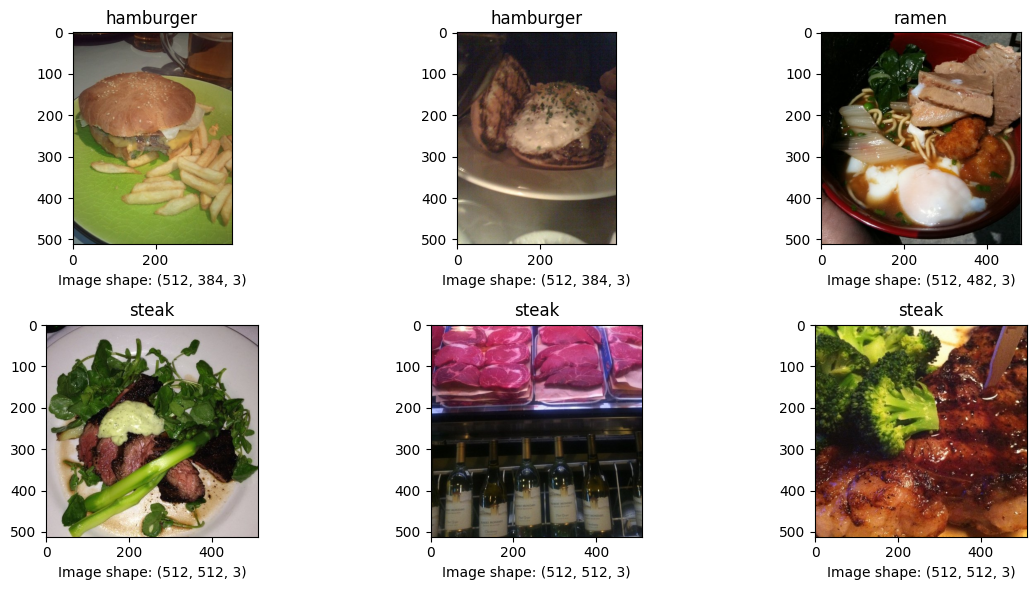

In [13]:
# Plot random images from the data
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Plot the images
img = plot_random_images(data_dir = train_dir)

In [14]:
# Fetch the class names
import pathlib
dir = pathlib.Path('10_food_classes_all_data/train')
class_names = sorted([item.name for item in dir.glob('*')])
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [26]:
# Now that we have visualized our data lets import it from the directories

# Preprocess the images (normalize and resize the images)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255,
                                                                rotation_range = 0.2,
                                                                shear_range = 0.2,
                                                                zoom_range = 0.2,
                                                                width_shift_range = 0.2,
                                                                height_shift_range = 0.2,
                                                                horizontal_flip = True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)

# Import images from the directories
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               seed = 42,
                                               class_mode = 'categorical')

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              seed = 42,
                                              class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [27]:
import tensorflow as tf

# Convert DirectoryIterator to TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, len(class_names)])  # Adjust output_shapes accordingly
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_data,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, len(class_names)])  # Adjust output_shapes accordingly
)

# Prefetch training data
train_dataset = train_dataset.shuffle(buffer_size = len(train_data)).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Prefetch test data
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [28]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [29]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [30]:
# Set up learning rate scheduler and Early stopping
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 3,
                               verbose = 1)

In [31]:
# Building the model
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), activation = 'relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (2,2), activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(len(class_names), activation = 'softmax')
])

# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fit the model
model_history = model.fit(train_dataset,
                          epochs = 100,
                          steps_per_epoch = len(train_data),
                          validation_data = test_dataset,
                          validation_steps = int(len(test_data) * 0.10),
                          callbacks = [lr_scheduler, early_stopping])

Epoch 1/100
235/235 [==============================] - 194s 425ms/step - loss: 2.1911 - accuracy: 0.1927 - val_loss: 2.0817 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/100
235/235 [==============================] - 97s 416ms/step - loss: 2.0553 - accuracy: 0.2637 - val_loss: 2.0058 - val_accuracy: 0.2902 - lr: 0.0011
Epoch 3/100
235/235 [==============================] - 103s 440ms/step - loss: 1.9808 - accuracy: 0.2999 - val_loss: 1.8572 - val_accuracy: 0.3214 - lr: 0.0013
Epoch 4/100
235/235 [==============================] - 98s 417ms/step - loss: 1.9074 - accuracy: 0.3321 - val_loss: 1.8053 - val_accuracy: 0.3705 - lr: 0.0014
Epoch 5/100
235/235 [==============================] - 100s 428ms/step - loss: 1.8820 - accuracy: 0.3399 - val_loss: 1.8357 - val_accuracy: 0.3527 - lr: 0.0016
Epoch 6/100
235/235 [==============================] - 102s 435ms/step - loss: 1.8395 - accuracy: 0.3599 - val_loss: 1.7320 - val_accuracy: 0.4107 - lr: 0.0018
Epoch 7/100
235/235 [=====================

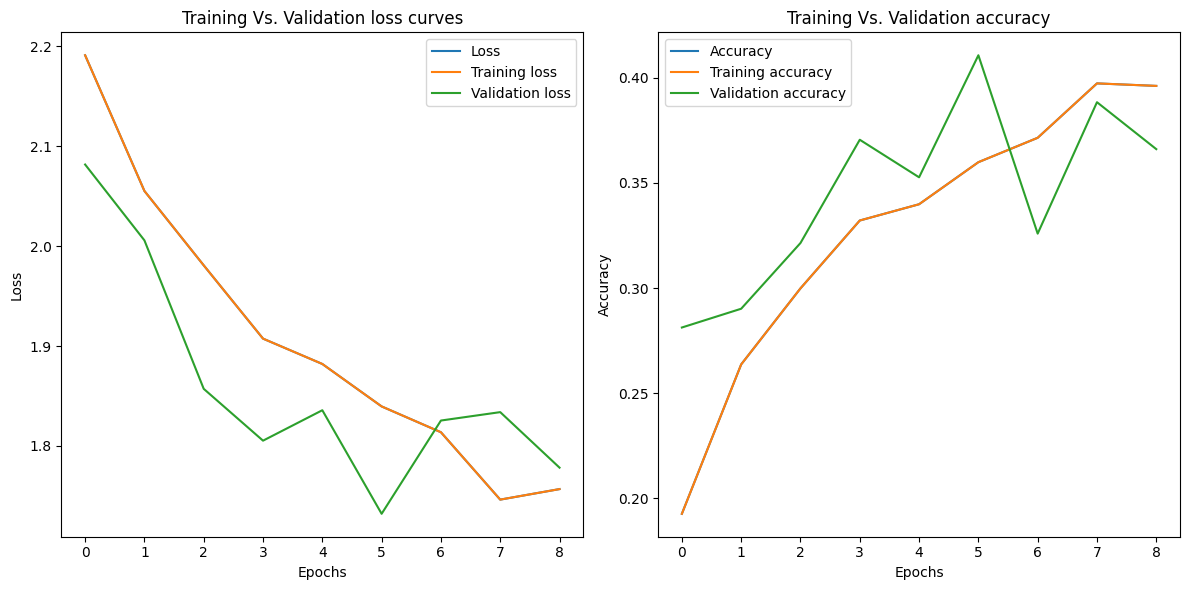

In [32]:
from helper_function import plot_loss_curves
plot_loss_curves(model_history, classification = True, val_data = True)

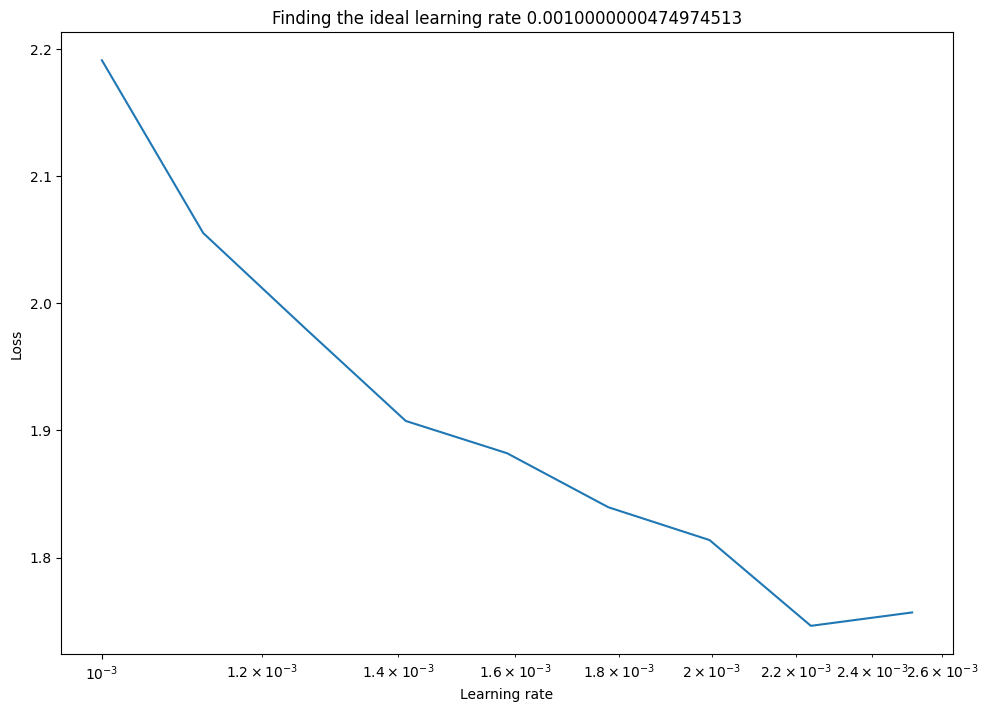

In [38]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
lrs = model_history.history['lr']
plt.semilogx(lrs, model_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.tight_layout()
plt.title(f"Finding the ideal learning rate {min(lrs)}");